In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Setting the end date to today
end = datetime.today()
#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
eth = pdr.DataReader('GGAL','yahoo',start,end)

In [5]:
eth.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,7.82,6.86,7.56,7.01,1123300.0,6.930715
2020-04-07,7.59,6.78,7.38,6.93,1346900.0,6.851619
2020-04-08,7.24,7.00,7.09,7.20,993900.0,7.118566
2020-04-09,7.54,6.87,7.42,7.09,824800.0,7.009810
2020-04-13,7.18,6.60,7.10,6.83,891400.0,6.752750


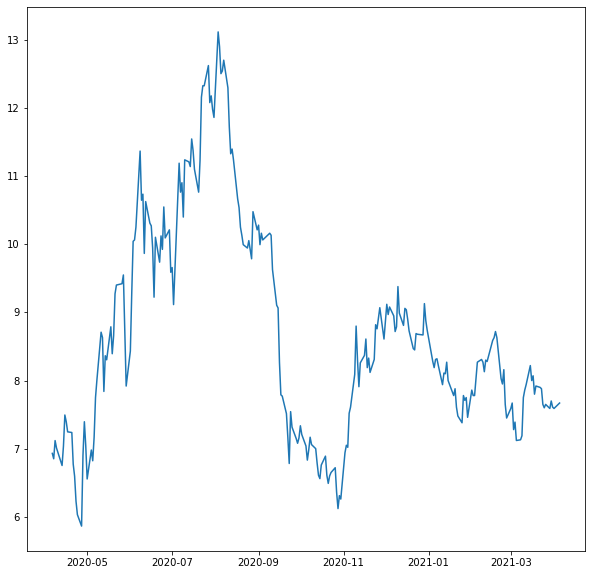

In [6]:
# Plot date and average price 
plt.figure(figsize=(10,10))
plt.plot(eth.index, eth["Adj Close"])

## Media movil

<AxesSubplot:xlabel='Date'>

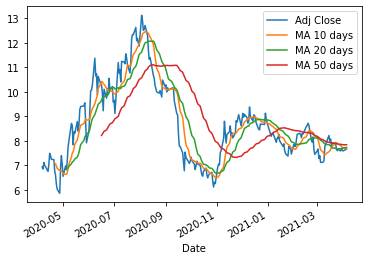

In [7]:
ma_days = [10,20,50]
for ma in ma_days:
 column_name = "MA %s days" %(str(ma))
 eth[column_name] = eth["Adj Close"].rolling(window=ma,center=False).mean()
eth[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True)

In [8]:
btc = pdr.DataReader('BTC-USD','yahoo',start,end)
ltc = pdr.DataReader('LTC-USD','yahoo',start,end)

In [13]:
eth = eth[["Adj Close"]]
eth  = eth.rename(columns = {"Adj Close":"ethereum"})

In [9]:


btc = btc[["Adj Close"]]
btc = btc.rename(columns = {"Adj Close":"bitcoin"})

ltc = ltc[["Adj Close"]]
ltc = ltc.rename(columns = {"Adj Close":"litcoin"})

In [10]:
#pueden hacer la union con todas las criptomonedas y ver la correlacion

merged_df = pd.merge(eth, btc, left_index=True, right_index=True)
union_close = pd.merge(merged_df, ltc, left_index=True, right_index=True)


<AxesSubplot:>

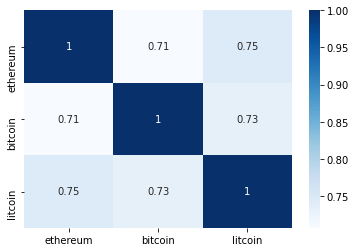

In [44]:
uniopn = union_close.pct_change()
corr = uniopn.dropna().corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')
            

In [15]:
eth.reset_index(inplace=True)

In [16]:
eth

,Date,ethereum
0,2020-04-06,6.930715
1,2020-04-07,6.851619
2,2020-04-08,7.118566
3,2020-04-09,7.009810
4,2020-04-13,6.752750
...,...,...
216,2021-02-12,8.280000
217,2021-02-16,8.590000
218,2021-02-17,8.630000
219,2021-02-18,8.720000


In [17]:
eth = eth.rename(columns = {"Date":"ds", "ethereum":"y"})

In [18]:
estimated_days = 30

In [19]:
df0=eth.copy()
eth = eth[:-estimated_days]

In [20]:
from fbprophet import Prophet


In [21]:
m = Prophet()
m.fit(eth)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = m.make_future_dataframe(estimated_days*2, freq='D')
forecast = m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-06,6.503780,5.570487,7.248563,6.503780,6.503780,-0.070003,-0.070003,-0.070003,-0.070003,-0.070003,-0.070003,0.0,0.0,0.0,6.433777
1,2020-04-07,6.552872,5.720576,7.312002,6.552872,6.552872,-0.061574,-0.061574,-0.061574,-0.061574,-0.061574,-0.061574,0.0,0.0,0.0,6.491298
2,2020-04-08,6.601965,5.680070,7.351460,6.601965,6.601965,-0.087855,-0.087855,-0.087855,-0.087855,-0.087855,-0.087855,0.0,0.0,0.0,6.514110
3,2020-04-09,6.651057,5.731924,7.327993,6.651057,6.651057,-0.117157,-0.117157,-0.117157,-0.117157,-0.117157,-0.117157,0.0,0.0,0.0,6.533900
4,2020-04-13,6.847427,5.956663,7.588706,6.847427,6.847427,-0.070003,-0.070003,-0.070003,-0.070003,-0.070003,-0.070003,0.0,0.0,0.0,6.777423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2021-03-03,10.794113,9.287684,12.000111,9.650000,11.813859,-0.087855,-0.087855,-0.087855,-0.087855,-0.087855,-0.087855,0.0,0.0,0.0,10.706258
247,2021-03-04,10.820994,9.185779,12.168733,9.645969,11.865235,-0.117157,-0.117157,-0.117157,-0.117157,-0.117157,-0.117157,0.0,0.0,0.0,10.703836
248,2021-03-05,10.847874,9.337639,12.123477,9.650374,11.916469,-0.054555,-0.054555,-0.054555,-0.054555,-0.054555,-0.054555,0.0,0.0,0.0,10.793320
249,2021-03-06,10.874755,9.629235,12.515705,9.657149,11.971202,0.195572,0.195572,0.195572,0.195572,0.195572,0.195572,0.0,0.0,0.0,11.070327


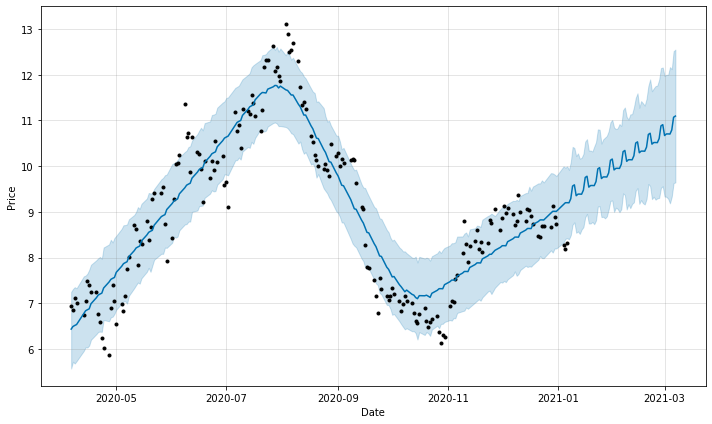

In [24]:
figure = m.plot(forecast, xlabel="Date", ylabel="Price")

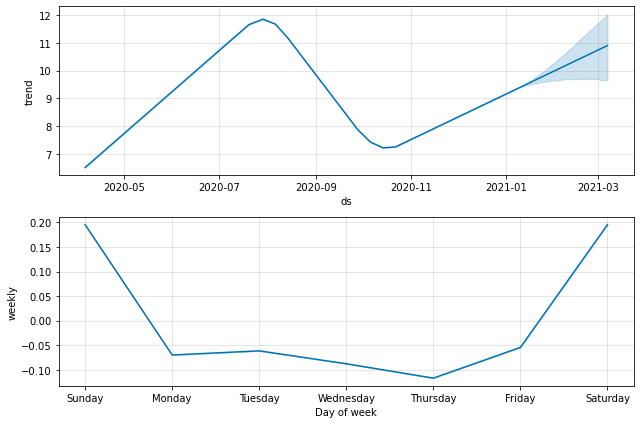

In [25]:
figure2 = m.plot_components(forecast)

In [56]:
trace = go.Scatter(
    name = 'Actual price',
    mode = 'markers',
    x = list(forecast['ds']),
    y = list(eth['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

In [57]:
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)

In [58]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [59]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [60]:
tracex = go.Scatter(
    name = 'Actual price',
   mode = 'markers',
   x = list(df0['ds']),
   y = list(df0['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [61]:
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='ethereum Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

In [27]:
plt.savefig('btc02.png')


<Figure size 432x288 with 0 Axes>

In [28]:
py.offline.iplot(figure)


In [29]:
estimated_days=30
import fbprophet



In [30]:
#Setting the end date to today
end = datetime.today()
#Start date set to one year back
start = datetime(end.year-5,end.month,end.day)
eth = pdr.DataReader('ETH-USD','yahoo',start,end)

In [31]:
df = df0.copy()
df1=df.copy()
df = df[:-estimated_days]
df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15,yearly_seasonality=True,daily_seasonality=True)
df_prophet.fit(df)
df_forecast = df_prophet.make_future_dataframe(periods= estimated_days*2, freq='D')
df_forecast = df_prophet.predict(df_forecast)
trace = go.Scatter(
    name = 'Actual price',
    mode = 'markers',
    x = list(df_forecast['ds']),
    y = list(df['y']),
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)
trace1 = go.Scatter(
    name = 'trend',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat']),
    marker=dict(
        color='red',
        line=dict(width=3)
    )
)
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(df_forecast['ds']),
    y = list(df_forecast['yhat_lower']),
    line= dict(color='#1705ff')
)
tracex = go.Scatter(
    name = 'Actual price',
   mode = 'markers',
   x = list(df1['ds']),
   y = list(df1['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)
data = [tracex, trace1, lower_band, upper_band, trace]

layout = dict(title='Crypto Price Estimation Using FbProphet',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)
plt.savefig('btc03.png')
py.offline.iplot(figure)

<Figure size 432x288 with 0 Axes>